# Heart disease project


This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. 

Project goal is to predict if someone has disease or not. I will explore what parameters affects on heart disease and visualize connections between them.

## Exploring dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Attribute Information:
- age - age of patient
- sex - female(1) / male(0)
- cp -  chest pain type (4 values)
- trestbps - resting blood pressure
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl
- restecg - resting electrocardiographic results (values 0,1,2)
- thalach - maximum heart rate achieved
- exang - exercise induced angina
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal -  0 = normal; 1 = fixed defect; 2 = reversable defect
- target - the "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Everything looks fine we dont'have missing values.

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Making new columns

In [5]:
# New column of sex with female and male values for better understanding
df["gender"]=df["sex"].replace(1,"female").replace(0,"male")
# New column of patients stat
df["patient_stat"]=df["target"].replace(1,"disease").replace(0,"no disease")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease


## Searchin for outliers

In [6]:
# Shape of dataset before cleaning outliers
df.shape

(1025, 16)

In [7]:
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xdae0fa0>,
 'caps': [<matplotlib.lines.Line2D at 0xdaf8328>,
 'boxes': [<matplotlib.lines.Line2D at 0xdae0df0>],
 'medians': [<matplotlib.lines.Line2D at 0xdaf8688>],
 'fliers': [<matplotlib.lines.Line2D at 0xdaf8808>],
 'means': []}

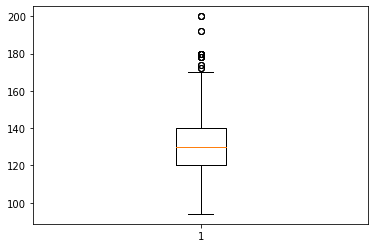

In [8]:
#visualize outliers with boxplot
plt.boxplot(df['trestbps'])

In [9]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=140 + 1.5*(140 - 120)
max_threshold


170.0

In [10]:
#how many outliers do we have (values greater than max_threshold)
outliers=df[df.trestbps>max_threshold]
outliers.shape

(30, 16)

In [11]:
# Removing outliers
df2=df[df.trestbps<max_threshold]
# recalculate summary statistics
df2['trestbps'].describe()

count    980.000000
mean     129.481633
std       14.619403
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      165.000000
Name: trestbps, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xdb7e628>,
 'caps': [<matplotlib.lines.Line2D at 0xdb7e988>,
 'boxes': [<matplotlib.lines.Line2D at 0xdb7e478>],
 'medians': [<matplotlib.lines.Line2D at 0xdb7ece8>],
 'fliers': [<matplotlib.lines.Line2D at 0xdb7ee68>],
 'means': []}

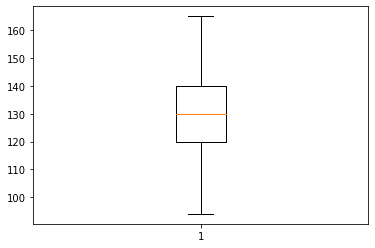

In [12]:
#boxplot after removing outliers
plt.boxplot(df2['trestbps'])

In [13]:
df['chol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xdbb2d48>,
 'caps': [<matplotlib.lines.Line2D at 0xdbc10d0>,
 'boxes': [<matplotlib.lines.Line2D at 0xdbb2b98>],
 'medians': [<matplotlib.lines.Line2D at 0xdbc1430>],
 'fliers': [<matplotlib.lines.Line2D at 0xdbc15b0>],
 'means': []}

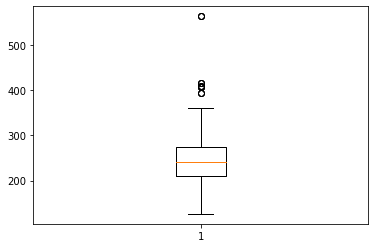

In [14]:
#visualize outliers with boxplot
plt.boxplot(df['chol'])

In [15]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=275 + 1.5*(275 - 211)
max_threshold

371.0

In [16]:
#how many outliers do we have (values greater than max_threshold)
outliers=df[df.chol>max_threshold]
outliers.shape

(16, 16)

In [17]:
# Removing outliers
df3=df2[df2.chol<max_threshold]
# recaculate summary statistics
df3['chol'].describe()

count    964.000000
mean     241.763485
std       45.235579
min      126.000000
25%      209.000000
50%      239.000000
75%      271.000000
max      360.000000
Name: chol, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xdbe8e50>,
 'caps': [<matplotlib.lines.Line2D at 0xdbf31c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xdbe8ca0>],
 'medians': [<matplotlib.lines.Line2D at 0xdbf3520>],
 'fliers': [<matplotlib.lines.Line2D at 0xdbf36a0>],
 'means': []}

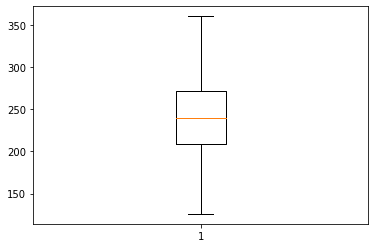

In [18]:
#boxplot after removing outliers
plt.boxplot(df3['chol'])

In [19]:
df['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xdc1afe8>,
 'caps': [<matplotlib.lines.Line2D at 0xdc28370>,
 'boxes': [<matplotlib.lines.Line2D at 0xdc1ae38>],
 'medians': [<matplotlib.lines.Line2D at 0xdc286d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xdc28850>],
 'means': []}

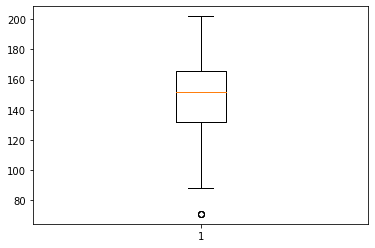

In [20]:
#visualize outliers with boxplot
plt.boxplot(df['thalach'])

In [21]:
#Lower Outlier Threshold = Q1 – 1.5(IQR)
lower_threshold= 132 - 1.5*(166-132)
lower_threshold

81.0

In [22]:
# Removing outliers
df4=df3[df3.thalach>lower_threshold]
# recaculate summary statistics
df4['thalach'].describe()

count    960.000000
mean     149.273958
std       22.894439
min       88.000000
25%      132.000000
50%      152.000000
75%      168.000000
max      202.000000
Name: thalach, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xdc58f40>,
 'caps': [<matplotlib.lines.Line2D at 0xdc662c8>,
 'boxes': [<matplotlib.lines.Line2D at 0xdc58da8>],
 'medians': [<matplotlib.lines.Line2D at 0xdc66628>],
 'fliers': [<matplotlib.lines.Line2D at 0xdc667a8>],
 'means': []}

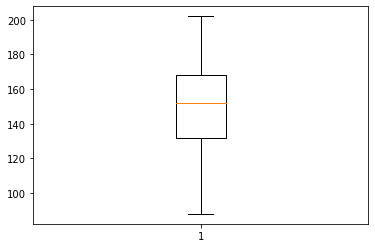

In [23]:
#boxplot after removing outliers
plt.boxplot(df4['thalach'])

In [24]:
df4['oldpeak'].describe()

count    960.000000
mean       1.025729
std        1.139267
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xdc961a8>,
 'caps': [<matplotlib.lines.Line2D at 0xdc96508>,
 'boxes': [<matplotlib.lines.Line2D at 0xdc86fe8>],
 'medians': [<matplotlib.lines.Line2D at 0xdc96868>],
 'fliers': [<matplotlib.lines.Line2D at 0xdc969e8>],
 'means': []}

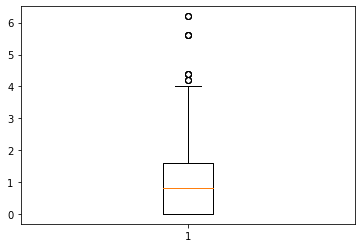

In [25]:
#visualize outliers with boxplot
plt.boxplot(df4['oldpeak'])

In [26]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=275 + 1.5*(275 - 211)
max_threshold=1.6+1.5*(1.6)
max_threshold

4.0

In [27]:
# Removing outliers
df5=df4[df4.oldpeak<max_threshold]
# recaculate summary statistics
df5['oldpeak'].describe()

count    942.000000
mean       0.952760
std        1.012424
min        0.000000
25%        0.000000
50%        0.650000
75%        1.600000
max        3.800000
Name: oldpeak, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xdcc6868>,
 'caps': [<matplotlib.lines.Line2D at 0xdcc6bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0xdcc66b8>],
 'medians': [<matplotlib.lines.Line2D at 0xdcc6f28>],
 'fliers': [<matplotlib.lines.Line2D at 0xdcd20d0>],
 'means': []}

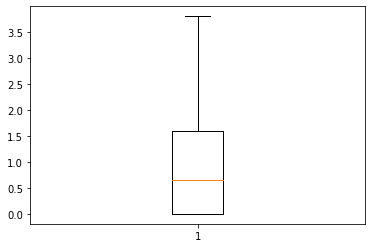

In [28]:
#visualize outliers with boxplot
plt.boxplot(df5['oldpeak'])

In [29]:
# shape of dataset after cleaning dataset
df5.shape

(942, 16)

## Data visualization

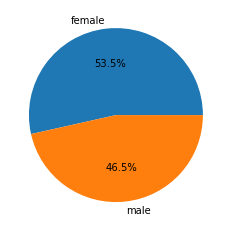

In [30]:
# Percentage of female and male patient with heart disease
plt.pie(x=df5['patient_stat'].value_counts(), labels=df5['gender'].value_counts().index, autopct='%1.1f%%')
plt.show()

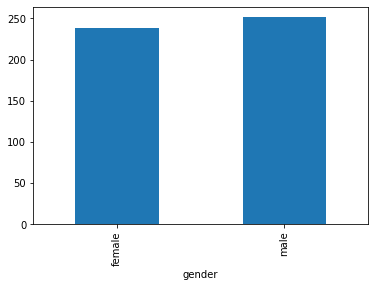

In [95]:
# female and male average cholesterol 
df5.groupby('gender')['chol'].mean().plot.bar()

We can see from the top diagram that males have little higher  cholesterol then females.

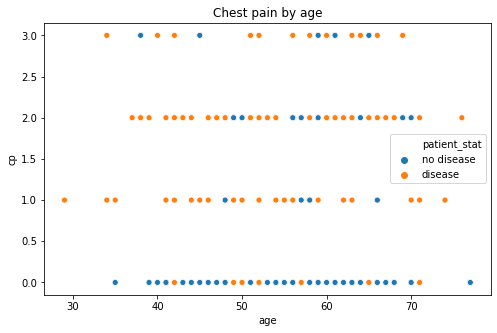

In [93]:
title = 'Chest pain by age'
plt.figure(figsize=(8,5))
sns.scatterplot(df5.age,df5.cp,hue=df5.patient_stat).set_title(title)
plt.ioff()

Patients with no disease have lowest  chest pain at almost every age. Patients with disease have chest pain even in younger ages but it's not high. The most patient with heart disease between 35 and 70 have chest pain value 1-2.

## Categorize "age" column

In [33]:
#Lenght of unique values in age column
len(df5["age"].unique())

41

In [34]:
df5["age"].describe()

count    942.000000
mean      53.933121
std        9.191595
min       29.000000
25%       46.250000
50%       55.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [35]:
df6=df5.copy()

In [36]:
# Defining function that will categorize age column into three groups
def age (row):
    if row["age"]<=35:
        return "Young"
    if(35< row["age"]<=55):
        return "Mid_age"
    else:
        return "Old"

df6["old"]=df6.apply(age,axis=1)

In [37]:
df6.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat,old
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease,Mid_age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease,Mid_age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease,Old
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease,Old
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease,Old


## Categorize "trestbps" column 

In [38]:
#Lenght of unique values in trestbps column
len(df6["trestbps"].unique())

41

In [39]:
df6["trestbps"].describe()

count    942.000000
mean     129.245223
std       14.608543
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      165.000000
Name: trestbps, dtype: float64

In [40]:
#Calculating average blood pressure
df6["trestbps"].mean()

129.24522292993632

In [41]:
df7=df6.copy()

In [42]:
# Defining function that will categorize blood_pressure into three groups
def blood_pressure (row):
    if row["trestbps"]<=115:
        return "Low_pressure"
    if(115< row["trestbps"]<=130):
        return "Normal_pressure"
    else:
        return "High"

df7["blood_pressure_stat"]=df7.apply(blood_pressure,axis=1)
df7.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat,old,blood_pressure_stat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease,Mid_age,Normal_pressure
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease,Mid_age,High
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease,Old,High
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease,Old,High
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease,Old,High


## Categorize "chol" column

In [43]:
#Lenght of unique values in chol column
len(df7["chol"].unique())

141

In [44]:
df7["chol"].describe()

count    942.000000
mean     241.866242
std       44.995208
min      126.000000
25%      209.000000
50%      239.000000
75%      270.750000
max      360.000000
Name: chol, dtype: float64

In [45]:
#calculating average cholesterol 
df7["chol"].mean()

241.86624203821657

In [46]:
df8=df7.copy()

In [47]:
#function for categorize chol column into 3 groups
def chol_stat (row):
    if row["chol"]<=160:
        return "Low_chol"
    if(160< row["chol"]<=250):
        return "mid_chol"
    else:
        return "High_chol"

df8["chol_stat"]=df8.apply(chol_stat,axis=1)
df8.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat,old,blood_pressure_stat,chol_stat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease,Mid_age,Normal_pressure,mid_chol
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease,Mid_age,High,mid_chol
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease,Old,High,mid_chol
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease,Old,High,mid_chol
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease,Old,High,High_chol


## Categorize "thalach" column

In [48]:
df8["thalach"].describe()

count    942.000000
mean     149.598726
std       22.911471
min       88.000000
25%      132.000000
50%      152.000000
75%      168.000000
max      202.000000
Name: thalach, dtype: float64

In [49]:
# Calculating average value of heart rate
df8["thalach"].mean()

149.59872611464968

In [50]:
df9=df8.copy()

In [51]:
#function to categorize thalach column into  three groups
def heart_rate (row):
    if row["thalach"]<=120:
        return "Low_rate"
    if(110< row["thalach"]<=160):
        return "mid_rate"
    else:
        return "High_rate"

df9["heart_rate_stat"]=df9.apply(heart_rate,axis=1)
df9.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat,old,blood_pressure_stat,chol_stat,heart_rate_stat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease,Mid_age,Normal_pressure,mid_chol,High_rate
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease,Mid_age,High,mid_chol,mid_rate
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease,Old,High,mid_chol,mid_rate
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease,Old,High,mid_chol,High_rate
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease,Old,High,High_chol,Low_rate


## Categorize "oldpeak" column

In [52]:
df9["oldpeak"].describe()

count    942.000000
mean       0.952760
std        1.012424
min        0.000000
25%        0.000000
50%        0.650000
75%        1.600000
max        3.800000
Name: oldpeak, dtype: float64

In [53]:
#Calculating average depression level
df9["oldpeak"].mean()

0.9527600849256911

In [54]:
df10=df9.copy()

In [55]:
#function that categorize oldpeak column into groups
def depression (row):
    if row["oldpeak"]<=1:
        return "Low_rate"
    if(1< row["oldpeak"]<=2):
        return "mid_rate"
    else:
        return "High_rate"

df10["depression_stat"]=df10.apply(depression,axis=1)
df10.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,gender,patient_stat,old,blood_pressure_stat,chol_stat,heart_rate_stat,depression_stat
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,female,no disease,Mid_age,Normal_pressure,mid_chol,High_rate,Low_rate
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,female,no disease,Mid_age,High,mid_chol,mid_rate,High_rate
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,female,no disease,Old,High,mid_chol,mid_rate,High_rate
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,0,female,no disease,Old,High,mid_chol,High_rate,Low_rate
4,62,0,0,138,294,1,1,106,0,1.9,...,3,2,0,male,no disease,Old,High,High_chol,Low_rate,mid_rate


## Preparing dataset for model

In [56]:
#Droping columns that we don't need
df11=df10.drop(["age","trestbps","chol","thalach","oldpeak","gender","patient_stat"],axis=1)
df11.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,old,blood_pressure_stat,chol_stat,heart_rate_stat,depression_stat
0,1,0,0,1,0,2,2,3,0,Mid_age,Normal_pressure,mid_chol,High_rate,Low_rate
1,1,0,1,0,1,0,0,3,0,Mid_age,High,mid_chol,mid_rate,High_rate
2,1,0,0,1,1,0,0,3,0,Old,High,mid_chol,mid_rate,High_rate
3,1,0,0,1,0,2,1,3,0,Old,High,mid_chol,High_rate,Low_rate
4,0,0,1,1,0,1,3,2,0,Old,High,High_chol,Low_rate,mid_rate


In [57]:
# Correlation between columns
df11.corr()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
sex,1.000000,-0.095347,0.074141,-0.074408,0.191620,-0.054668,0.163927,0.214558,-0.324446
cp,-0.095347,1.000000,0.087326,0.093940,-0.385233,0.117556,-0.137094,-0.208247,0.421128
fbs,0.074141,0.087326,1.000000,-0.098169,0.016639,-0.066815,0.132349,-0.049656,-0.034485
restecg,-0.074408,0.093940,-0.098169,1.000000,-0.092020,0.105242,-0.085585,0.036545,0.165284
exang,0.191620,-0.385233,0.016639,-0.092020,1.000000,-0.272634,0.103500,0.205471,-0.428829
slope,-0.054668,0.117556,-0.066815,0.105242,-0.272634,1.000000,-0.046988,-0.078462,0.327744
ca,0.163927,-0.137094,0.132349,-0.085585,0.103500,-0.046988,1.000000,0.166768,-0.369773
thal,0.214558,-0.208247,-0.049656,0.036545,0.205471,-0.078462,0.166768,1.000000,-0.356436
target,-0.324446,0.421128,-0.034485,0.165284,-0.428829,0.327744,-0.369773,-0.356436,1.000000


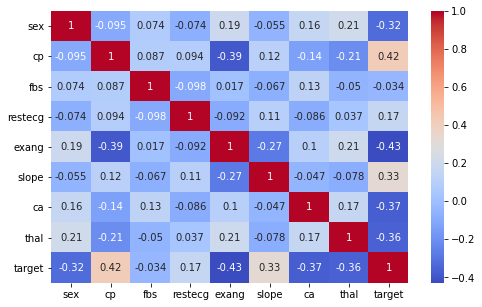

In [58]:
import seaborn as sns
#Showing correlation between columns
plt.figure(figsize=(8,5))
sns.heatmap(df11.corr(), annot=True, cmap='coolwarm')

Everything looks fine. We don't need to drop any column.

### Creating dummy columns

In [59]:
#function for creating dummies
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

In [60]:
#Using function on dataframe and columns

df12=create_dummies(df11,"old")
df13=df12.drop(["old"],axis=1)

df14=create_dummies(df13,"blood_pressure_stat")
df15=df14.drop(["blood_pressure_stat"],axis=1)

df16=create_dummies(df15,"chol_stat")
df17=df16.drop(["chol_stat"],axis=1)

df18=create_dummies(df17,"heart_rate_stat")
df19=df18.drop(["heart_rate_stat"],axis=1)

df20=create_dummies(df19,"depression_stat")
df21=df20.drop(["depression_stat"],axis=1)

df22=create_dummies(df21,"slope")
df23=df22.drop(["slope"],axis=1)

df24=create_dummies(df23,"ca")
df25=df24.drop(["ca"],axis=1)

df26=create_dummies(df25,"thal")
df27=df26.drop(["thal"],axis=1)



In [61]:
df27.head()

,sex,cp,fbs,restecg,exang,target,old_Mid_age,old_Old,old_Young,blood_pressure_stat_High,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


### Spliting dataframe on train and test 

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [63]:
# Defining features (X) and target column(y)
X=df27.drop("target",axis=1)
y=df27["target"]

In [64]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=1)

# Predictive models

### K Neighbors classifier model

In [65]:
# Importing KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# Defining model
kn=KNeighborsClassifier()

In [67]:
#Fitting model
kn.fit(train_X, train_y)

KNeighborsClassifier()

In [68]:
#Predicting values on test set
predictions_kn=kn.predict(test_X)

### K Neighbors classifier accuracy

In [69]:
#KNeighborsClassifier accuracy with accuracy_score
accuracy_kn=accuracy_score(test_y, predictions_kn)
accuracy_kn

0.8835978835978836

In [70]:
#KNeighborsClassifier accuracy with cros_val_score
accuracy_cross_val_kn=cross_val_score(kn, X, y, cv=10)
accuracy_cross_val_kn


array([0.93684211, 0.89473684, 0.90425532, 0.80851064, 0.84042553,
       0.90425532, 0.86170213, 0.93617021, 0.88297872, 0.88297872])

In [71]:
#calculating cross_val_score mean
accuracy_cross_val_knc=np.mean(accuracy_cross_val_kn)
accuracy_cross_val_knc

0.8852855543113103

### Logistic Regression model

In [72]:
# Importing LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [73]:
# Defininig model
lr=LogisticRegression()

In [74]:
# fitting the model
lr.fit(train_X, train_y)

LogisticRegression()

In [75]:
# predicting values on test set
predictions_lr=lr.predict(test_X)

### Logistic Regression accuracy

In [76]:
# calculating accuracy with accuracy_score()
accuracy_lr=accuracy_score(test_y, predictions_lr)
accuracy_lr

0.8941798941798942

In [77]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_lr=cross_val_score(lr, X, y, cv=10)
accuracy_cross_val_lr

array([0.87368421, 0.90526316, 0.89361702, 0.79787234, 0.86170213,
       0.92553191, 0.84042553, 0.85106383, 0.80851064, 0.80851064])

In [78]:
#calculating cross_val_score mean
accuracy_cross_val_lr=np.mean(accuracy_cross_val_lr)
accuracy_cross_val_lr

0.8566181410974243

###  Random Forest classifier model

In [79]:
#Importing RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

In [80]:
#Defining model
rf=RandomForestClassifier(n_estimators=5, random_state=1, min_samples_leaf=2)

In [81]:
# fitting the model
rf.fit(train_X, train_y)

RandomForestClassifier(min_samples_leaf=2, n_estimators=5, random_state=1)

In [82]:
# predicting values on test set
predictions_rf=rf.predict(test_X)

###  Random Forest classifier accuracy


In [83]:
# calculating accuracy with accuracy_score()
accuracy_rf=accuracy_score(test_y, predictions_rf)
accuracy_rf

0.9735449735449735

In [84]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_rf=cross_val_score(rf, X, y, cv=10)
accuracy_cross_val_rf

array([0.94736842, 0.93684211, 1.        , 0.93617021, 0.94680851,
       0.9787234 , 0.9893617 , 0.96808511, 0.94680851, 0.93617021])

In [85]:
#calculating cross_val_score mean
accuracy_cross_val_rf=np.mean(accuracy_cross_val_rf)
accuracy_cross_val_rf

0.958633818589026

## Results

|    Model           | Accuracy_score | Cross_val_score|
|--------------------|----------------|----------------|
|KNeighbors          |     88.3 %     |       88.5 %   |
|LogisticRegression  |     89.4 %     |       85.6 %   |
|RandomForest        |     97.3 %     |       95.8 %   |

We can see that RandomForest model is the best choice to use for predicting.